<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JavierP-rez/blob/main/Semana8_02to08Nov/Actividad%20Semanal_7RegresionesKmeans/kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Actividad Semanal -- 7 Regresiones y K means



---



---



* Nombre:
  * Javier Pérez Sanagustín

* Matrícula:
  * A01794233

Materia:

> Ciencia y analítica de datos (Gpo 10)


Profesora titular: María de la Paz Rico Fernández

Profesor tutor: Bernardo Charles Canales

Fecha: 04 de noviembre del 2022

# KMeans

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [3]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 10.7 MB/s 
     |████████████████████████████████| 1.0 MB 61.3 MB/s 
     |████████████████████████████████| 1.7 MB 39.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 44.6 MB/s 
     |████████████████████████████████| 6.3 MB 31.7 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=acef2ab94a454427dce64a32f3598915af296f054e7c38fd9f97e7ce44e5af65
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e235ef71ac8c0774bc6f59149d075db62c7bc16ae80986efc43047595e4172e4
  Stored in directory: /root/

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos.

In [5]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [6]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [8]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron.

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.


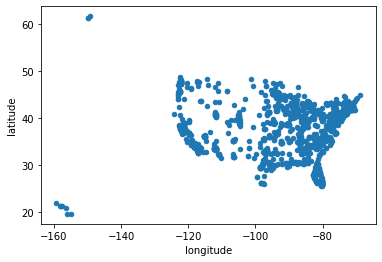

In [9]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [10]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [12]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [13]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [14]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

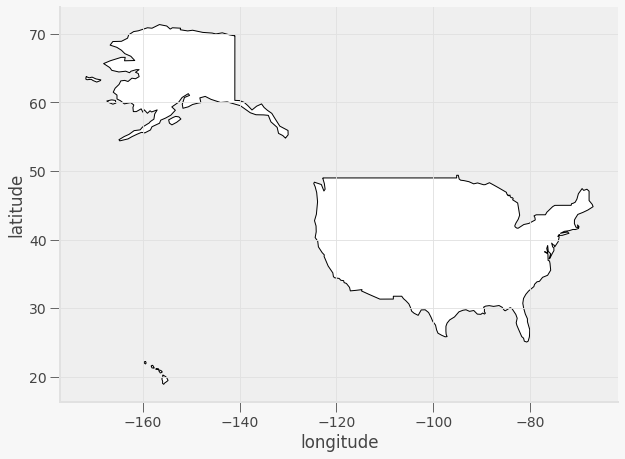

In [16]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

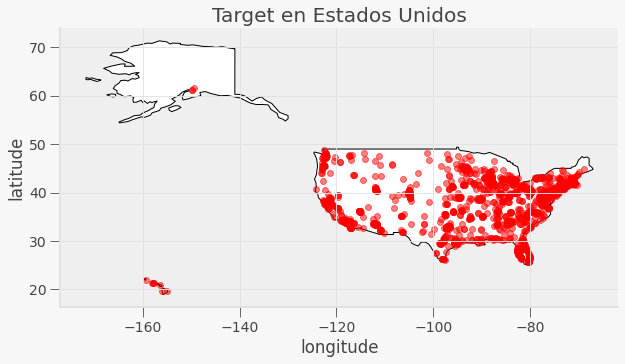

In [17]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿Qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes.

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

**Encuentra el numero ideal de almacenes, justifica tu respuesta:**

* Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?



In [20]:
#Se importa la librerías.
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import geopandas
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
import geopy.distance

In [19]:
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


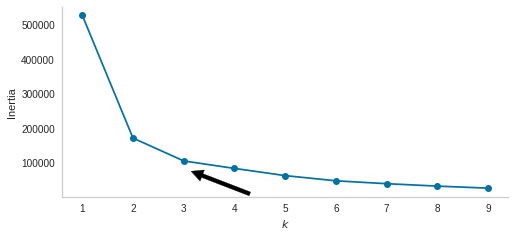

In [22]:
#Para seleccionar el número de tiendas, por medio de la gráfica de codo. 
X_cluster = gdf[['latitude', 'longitude']]

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_cluster)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(3, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.grid()
plt.show()

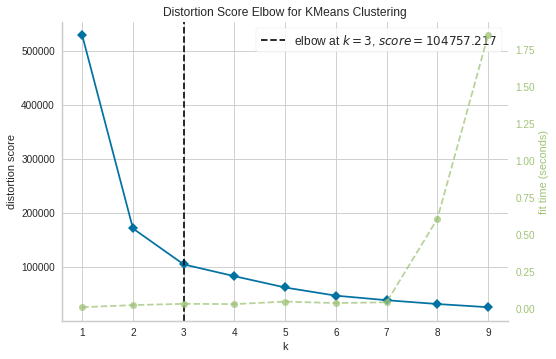

In [23]:
vzr = KElbowVisualizer(KMeans(n_clusters=3, random_state=42), k=(1, 10))
vzr.fit(X_cluster)
vzr.poof()

En el gráfico se puede observar que si se desea hacer segmentación, serían trés componentes. 

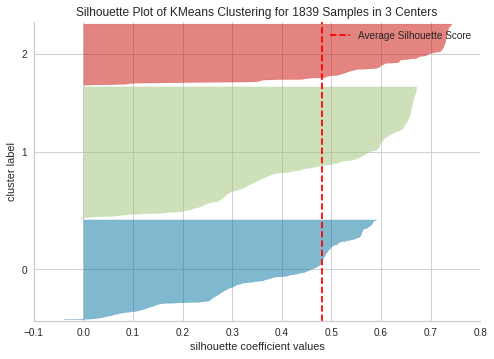

In [25]:
#Se comprueban las componentes con otro método
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3, random_state=42), colors='yellowbrick')
visualizer.fit(X_cluster)        
visualizer.show()        

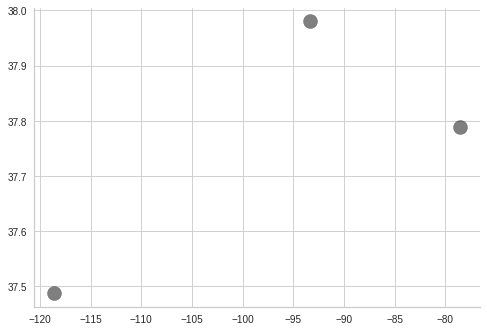

In [27]:
X_cluster = gdf[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cluster)
y_kmeans = kmeans.predict(X_cluster)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)

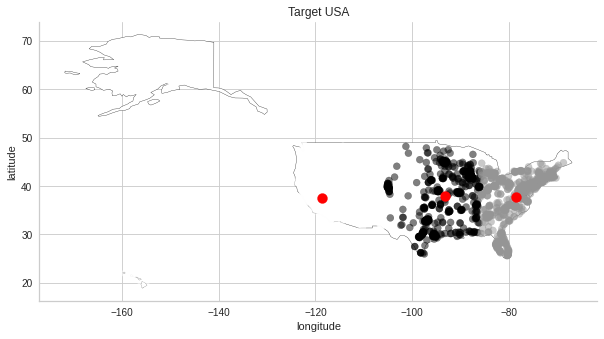

In [29]:
#Se ve la densidad en el mapa de las tiendas y almacenes de target en USA. 
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, c=y_kmeans, alpha = 0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=100)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target USA')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Se busca las coordenadas de los centroides encontrados y en función de esto encontramos las ciudades en las cuales pueden ubicarse cada uno de los almacenes.


In [30]:
df_shops = pd.DataFrame(centers, columns=['Latitude', 'Longitude'])

In [32]:
#Se obtiene la densidad de los almacenes, longitud y latitud
df_shops = pd.DataFrame(centers, columns=['Latitude', 'Longitude'])

geolocator = Nominatim(user_agent="geoapiExercises")
def city_state_country(row):
    coord = f"{row['Latitude']}, {row['Longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

df = df_shops.apply(city_state_country, axis=1)
df.head()

,Latitude,Longitude,city,state,country
0,37.487342,-118.624473,,California,United States
1,37.789554,-78.569908,,Virginia,United States
2,37.980063,-93.327172,,Missouri,United States


Con los datos del cluster se puede deducir los estados en donde se encuentrar las tiendas. 
* Virginia
* California
* Missouri

**Tiendas que se deben de abastecer**


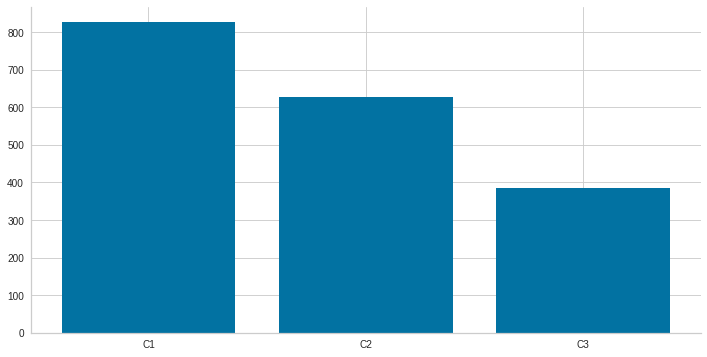

In [34]:
#Se obtiene los clusters de los almacenes
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['C1', 'C2', 'C3']
list_values = pd.DataFrame(y_kmeans).value_counts().to_list()
axs.bar(list_names, list_values)
plt.show()

In [35]:
#Distancia entre las tiendas. 
df_shops

,Latitude,Longitude
0,37.487342,-118.624473
1,37.789554,-78.569908
2,37.980063,-93.327172


In [36]:
#Distancia entre los clusters
c1 = (df_shops.loc[0,:].values)
c2 = (df_shops.loc[1,:].values)
c3 = (df_shops.loc[2,:].values)



dc1c2 = geopy.distance.geodesic(c1, c2)
dc1c3 = geopy.distance.geodesic(c1, c3)
dc2cl3 = geopy.distance.geodesic(c2, c3)
print(f'Distancia c1 c2: {round(dc1c2.km,3)} kms')
print(f'Distancia c1 c3: {round(dc1c3.km,3)} kms')
print(f'Distancia c2 c3: {round(dc2cl3.km,3)} kms')

Distancia c1 c2: 3507.814 kms
Distancia c1 c3: 2223.727 kms
Distancia c2 c3: 1297.004 kms


* ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

El procedimiento para elegir en número de almacenes fue por medio de segmentación, tomando en consideración la cantidad de grupos.Con la gráfica de codo se puede obtener la cantidad óptima de grupos. Al calcular la distancia entre el puntos se establece la cantidad óptima de almacenes. Se puede hacer más corroboraciones con otras librerías. 

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

* ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?

  * geopandas.
  * geopy.
  * yellowbrick.

* ¿Consideras importante que se grafique en un mapa?, ¿por qué?

Para tener una mejor visión gráfica de las coordenadas, es mejor hacerlo desde un mapa. En lo personal, fue se pude apreciar mejor la densidad y distancias con un ejemplo más visual. Por ello considero que es importante graficar con un mapa. 

* Agrega las conclusiones.

Los métodos de agrupación/segmentación son útiles para poder juntar variables que coincidan o estén relacionadas. Algo parecido que hace PCA para las variables correlacionadas. Existen métodos y librerías que permiten graficar de diversas maneras las variables o distribuciones geoespaciales de las segmentación. Por medio de la localización, se pudo tomar la decisión de la cantidad de almacenes y cuáles se deben de suministar. Por lo tanto se concluye que en el almacén 1 tiene mayor densidad, por lo tanto mayor tiendas y está ubicado en Virginia.


